In [2]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', '..', 'pplSIT', 'workflow', 'utils'))

In [3]:
%matplotlib inline

from session.sessions import selected_009266, selected_008229, selected_009265
from imports import *
from scipy import stats
from scipy import signal
from sklearn import decomposition
from Behavior.behavior import get_extent, get_idxs_behav_state, get_idxs_in_patches
from Behavior.behavior import density_map, density_map, get_idxs_neuro_state
from matplotlib.lines import Line2D
from population import unit_response_matrix, activity_at_phase

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [18]:
source = '/home/sobolev/nevermind_ag-grothe/AG_Pecka/data/processed/'
source = '/home/sobolev/nevermind/AG_Pecka/data/processed/'

# 009266
# sessions = [s for s in selected_009266.keys()]
# sessions.sort()
# selected = sessions[:]


# 009265
# sessions = [s for s in selected_009265.keys()]
# sessions.sort()
# selected = sessions[:]
# selected.remove('009265_hippoSIT_2023-02-27_10-18-32')
# selected.remove('009265_hippoSIT_2023-02-27_15-33-46')
# selected = selected[7:-1]


# animal 57
# selected = [
#     "57_SIT_2023-12-21_15-05-52",
#     "57_SIT_2023-12-22_14-08-07",
#     "57_SIT_2023-12-22_17-37-18",
#     "57_SIT_2023-12-28_16-43-28",
#     "57_SIT_2023-12-29_11-06-26",
#     "57_SIT_2023-12-29_11-40-14",
#     "57_SIT_2024-01-02_16-38-05",
#     "57_SIT_2024-01-02_17-10-09",
#     "57_SIT_2024-01-03_19-54-59",
# ]

# all 57
selected = [
    "57_SIT_2023-12-18_14-07-34",
    "57_SIT_2023-12-19_14-15-26",
    "57_SIT_2023-12-22_14-08-07",
    "57_SIT_2023-12-22_14-43-58",
    "57_SIT_2023-12-22_17-37-18",
    "57_SIT_2023-12-23_14-21-01",
    "57_SIT_2023-12-28_16-43-28",
    "57_SIT_2023-12-29_11-06-26",
    "57_SIT_2023-12-29_11-40-14",
    "57_SIT_2023-12-29_12-11-46",
    "57_SIT_2024-01-02_14-43-18",
    "57_SIT_2024-01-02_16-38-05",
    "57_SIT_2024-01-02_17-10-09",
    "57_SIT_2024-01-03_19-22-18",
    "57_SIT_2024-01-03_19-54-59",
    "57_SIT_2024-01-04_14-16-22",
    "57_SIT_2024-01-04_14-52-59",
    "57_SIT_2024-01-05_14-35-49",
    "57_SIT_2024-01-05_15-08-34",
    "57_SIT_2024-01-06_16-52-40",
    "57_SIT_2024-01-06_17-25-35",
    "57_SIT_2024-01-07_19-23-28",
    "57_SIT_2024-01-08_15-51-26",
    "57_SIT_2024-01-12_13-23-02",
    "57_SIT_2024-01-15_13-45-22",
    "57_SIT_2024-01-15_14-34-48"
]


# showcase
# selected = [
#     '009266_hippoSIT_2023-05-04_19-47-15',
#     '009266_hippoSIT_2023-04-17_17-04-17',
#     '009266_hippoSIT_2023-05-23_09-18-05'
# ]
# selected = [
#     '009265_hippoSIT_2023-03-09_20-03-08',
#     '009265_hippoSIT_2023-03-05_11-52-17'
# ]

# showcase for Fig. 5
# selected = [
#     '009265_hippoSIT_2023-03-09_20-03-08',
#     '009266_hippoSIT_2023-04-17_17-04-17',
#     '009266_hippoSIT_2023-04-18_10-10-37',
#     '009266_hippoSIT_2023-04-20_08-57-39',
#     '009266_hippoSIT_2023-04-24_10-08-11',
#     '009266_hippoSIT_2023-04-26_08-20-17',
#     '009266_hippoSIT_2023-05-02_12-22-14',
#     '009266_hippoSIT_2023-05-04_19-47-15',
#     '009266_hippoSIT_2023-05-23_09-18-05',
#     '009265_hippoSIT_2023-03-03_09-37-07',
#     '009265_hippoSIT_2023-03-04_11-12-04',
#     '009265_hippoSIT_2023-03-05_11-52-17',
# ]

selected

['57_SIT_2023-12-18_14-07-34',
 '57_SIT_2023-12-19_14-15-26',
 '57_SIT_2023-12-22_14-08-07',
 '57_SIT_2023-12-22_14-43-58',
 '57_SIT_2023-12-22_17-37-18',
 '57_SIT_2023-12-23_14-21-01',
 '57_SIT_2023-12-28_16-43-28',
 '57_SIT_2023-12-29_11-06-26',
 '57_SIT_2023-12-29_11-40-14',
 '57_SIT_2023-12-29_12-11-46',
 '57_SIT_2024-01-02_14-43-18',
 '57_SIT_2024-01-02_16-38-05',
 '57_SIT_2024-01-02_17-10-09',
 '57_SIT_2024-01-03_19-22-18',
 '57_SIT_2024-01-03_19-54-59',
 '57_SIT_2024-01-04_14-16-22',
 '57_SIT_2024-01-04_14-52-59',
 '57_SIT_2024-01-05_14-35-49',
 '57_SIT_2024-01-05_15-08-34',
 '57_SIT_2024-01-06_16-52-40',
 '57_SIT_2024-01-06_17-25-35',
 '57_SIT_2024-01-07_19-23-28',
 '57_SIT_2024-01-08_15-51-26',
 '57_SIT_2024-01-12_13-23-02',
 '57_SIT_2024-01-15_13-45-22',
 '57_SIT_2024-01-15_14-34-48']

## Plot UMAP tSNE for W1-W4 event space

In [19]:
ft = 'tSNE'
fp = 70
#ft = 'UMAP'
#fp = '0.7'
speed_thresh = 0.04  # m/s
sound_state = 'BGR'
margin = 10
colors = ['green', 'tab:blue']
cmaps  = ['Greens', 'Blues']

In [20]:
# collect bU run / bU sta stats for all sessions using watershed clusters
s_stats = {}
for j, session in enumerate(selected):
    animal = session.split('_')[0]

    s_path     = os.path.join(source, animal, session)
    meta_file  = os.path.join(source, animal, session, 'meta.h5')
    desc_file  = os.path.join(source, animal, session, 'descendants.h5')
    umap_file  = os.path.join(source, animal, session, 'analysis', 'W1-W4_tSNE_UMAP.h5')
    nMAP_seg_file = os.path.join(source, animal, session, 'analysis', 'nMAP_segmentation.h5')

    with h5py.File(meta_file, 'r') as f:
        tl = np.array(f['processed']['timeline'])
        tgt_mx = np.array(f['processed']['target_matrix'])
        events = np.array(f['processed']['sound_events'])
    with h5py.File(desc_file, 'r') as f:
        speed = np.array(f['speed'])
        hd    = np.array(f['hd'])
    with h5py.File(nMAP_seg_file, 'r') as f:
        d_map = np.array(f['density_map'])
        segmentation = np.array(f['segmentation'])
        segmentation_TGT_succ = np.array(f['segmentation_TGT_succ'])
        idxs_tgt_succ_state_ev = np.array(f['idxs_tgt_succ_state_ev'])
        tgt_stats = np.array(f['tgt_stats'])
        tgt_stats_shuf = np.array(f['tgt_stats_shuf'])
        
    # auditory state (BGR, SIL etc.) and speed filter
    idxs_sta_ev = np.where(speed[events[:, 2].astype(np.int32)] < speed_thresh)[0]
    idxs_run_ev = np.where(speed[events[:, 2].astype(np.int32)] > speed_thresh)[0]
    idxs_bgr_ev = np.where(events[:, 1] == 1)[0]
    idxs_sil_ev = np.where(events[:, 1] == 0)[0]
    idxs_tgt_ev = np.where(events[:, 1] == 2)[0]
    idxs_noi_ev = np.where(events[:, 1] == -1)[0]
    idxs_tri_ev = np.where( (events[:, 1] == 1) | (events[:, 1] == 2) )[0]  # in the trial

    # final separation
    idxs_AL_bgr_ev  = np.intersect1d(idxs_tgt_succ_state_ev, idxs_bgr_ev)
    idxs_AL_tgt_ev  = np.intersect1d(idxs_tgt_succ_state_ev, idxs_tgt_ev)
    idxs_AL_sil_ev  = np.intersect1d(idxs_tgt_succ_state_ev, idxs_sil_ev)

    idxs_PH_ev = np.array([x for x in range(len(events)) if not x in idxs_tgt_succ_state_ev])
    idxs_PH_bgr_ev = np.intersect1d(idxs_PH_ev, idxs_bgr_ev)
    idxs_PH_sil_ev = np.intersect1d(idxs_PH_ev, idxs_sil_ev)

    idxs_AL_bgr_rest_ev = np.intersect1d(idxs_AL_bgr_ev, idxs_sta_ev)
    idxs_PH_bgr_rest_ev = np.intersect1d(idxs_PH_bgr_ev, idxs_sta_ev)
    idxs_PH_bgr_run_ev  = np.intersect1d(idxs_PH_bgr_ev, idxs_run_ev)
    idxs_AL_sil_rest_ev = np.intersect1d(idxs_AL_sil_ev, idxs_sta_ev)
    idxs_PH_sil_rest_ev = np.intersect1d(idxs_PH_sil_ev, idxs_sta_ev)
    idxs_PH_sil_run_ev  = np.intersect1d(idxs_PH_sil_ev, idxs_run_ev)

    s_stats[session] = {}
    s_stats[session]['PH_BGR_sta'] = idxs_PH_bgr_rest_ev
    s_stats[session]['PH_SIL_sta'] = idxs_PH_sil_rest_ev
    s_stats[session]['PH_BGR_run'] = idxs_PH_bgr_run_ev
    s_stats[session]['PH_SIL_run'] = idxs_PH_sil_run_ev

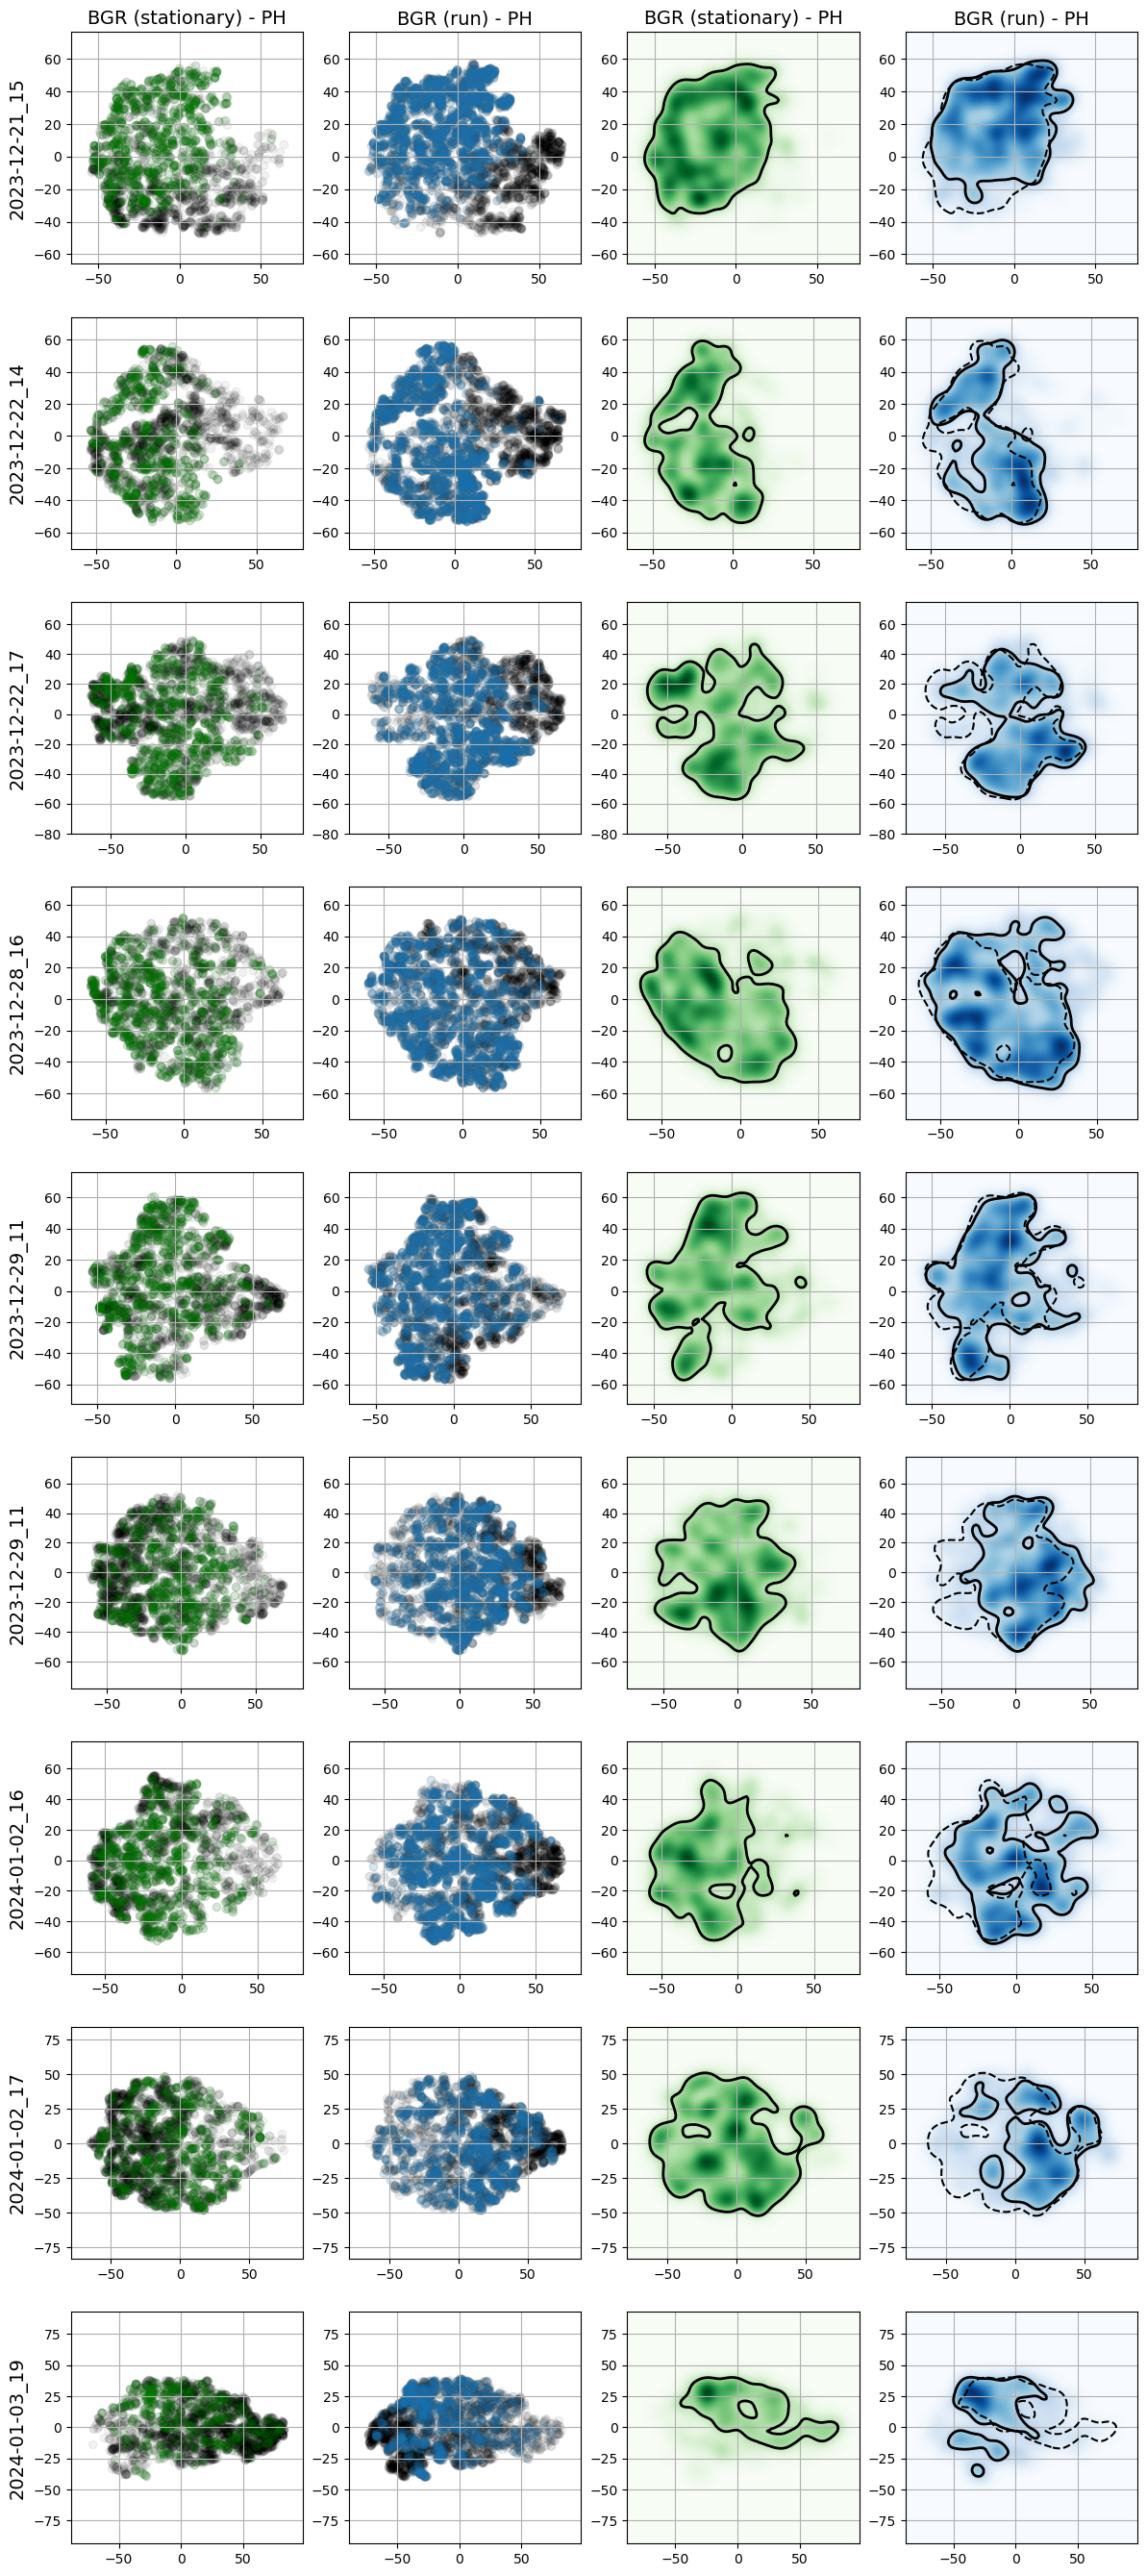

In [16]:
fig, axes = plt.subplots(len(selected), 4, figsize=(12, 3*len(selected)))


s_stats = {}
for j, session in enumerate(selected):
    animal = session.split('_')[0]

    s_path     = os.path.join(source, animal, session)
    meta_file  = os.path.join(source, animal, session, 'meta.h5')
    desc_file  = os.path.join(source, animal, session, 'descendants.h5')
    umap_file  = os.path.join(source, animal, session, 'analysis', 'W1-W4_tSNE_UMAP.h5')
    state_file = os.path.join(source, animal, session, 'analysis', 'state_idxs.h5')

    with h5py.File(meta_file, 'r') as f:
        tl = np.array(f['processed']['timeline'])
        tgt_mx = np.array(f['processed']['target_matrix'])
        events = np.array(f['processed']['sound_events'])
    with h5py.File(umap_file, 'r') as f:
        fit = np.array(f[ft][str(fp)])
    with h5py.File(desc_file, 'r') as f:
        speed = np.array(f['speed'])
        hd    = np.array(f['hd'])
    with h5py.File(state_file, 'r') as f:
        idxs_AL_ev = np.array(f['idxs_AL_ev'])  # bAL state
        idxs_neuro_AL_bgr_ev = np.array(f['idxs_neuro_AL_bgr_ev'])
        idxs_neuro_AL_sil_ev = np.array(f['idxs_neuro_AL_sil_ev'])
        idxs_neuro_PH_bgr_ev = np.array(f['idxs_neuro_PH_bgr_ev'])
        idxs_neuro_PH_sil_ev = np.array(f['idxs_neuro_PH_sil_ev'])
        
    # auditory state (BGR, SIL etc.) and speed filter
    idxs_sta_ev = np.where(speed[events[:, 2].astype(np.int32)] < speed_thresh)[0]
    idxs_run_ev = np.where(speed[events[:, 2].astype(np.int32)] > speed_thresh)[0]
    idxs_bgr_ev = np.where(events[:, 1] == 1)[0]
    idxs_sil_ev = np.where(events[:, 1] == 0)[0]
    idxs_tgt_ev = np.where(events[:, 1] == 2)[0]
    idxs_noi_ev = np.where(events[:, 1] == -1)[0]
    idxs_tri_ev = np.where( (events[:, 1] == 1) | (events[:, 1] == 2) )[0]  # in the trial

    # final separation
    idxs_AL_bgr_ev  = np.intersect1d(idxs_AL_ev, idxs_bgr_ev)
    idxs_AL_tgt_ev  = np.intersect1d(idxs_AL_ev, idxs_tgt_ev)
    idxs_AL_sil_ev  = np.intersect1d(idxs_AL_ev, idxs_sil_ev)

    idxs_PH_ev = np.array([x for x in range(len(events)) if not x in idxs_AL_ev])
    idxs_PH_bgr_ev = np.intersect1d(idxs_PH_ev, idxs_bgr_ev)
    idxs_PH_sil_ev = np.intersect1d(idxs_PH_ev, idxs_sil_ev)

    idxs_AL_bgr_rest_ev = np.intersect1d(idxs_AL_bgr_ev, idxs_sta_ev)
    idxs_PH_bgr_rest_ev = np.intersect1d(idxs_PH_bgr_ev, idxs_sta_ev)
    idxs_PH_bgr_run_ev  = np.intersect1d(idxs_PH_bgr_ev, idxs_run_ev)
    idxs_AL_sil_rest_ev = np.intersect1d(idxs_AL_sil_ev, idxs_sta_ev)
    idxs_PH_sil_rest_ev = np.intersect1d(idxs_PH_sil_ev, idxs_sta_ev)
    idxs_PH_sil_run_ev  = np.intersect1d(idxs_PH_sil_ev, idxs_run_ev)

    # ------- computing AL / PH from neural state - for cross-session stats
    idxs_neuro_PHs_b_ev = get_idxs_neuro_state(source, session, idxs_PH_bgr_rest_ev)
    idxs_neuro_PHs_bgr_ev = np.intersect1d(idxs_neuro_PHs_b_ev, idxs_bgr_ev)
    idxs_neuro_PHs_bgr_rest_ev = np.intersect1d(idxs_neuro_PHs_bgr_ev, idxs_sta_ev)
    idxs_neuro_PHr_b_ev = get_idxs_neuro_state(source, session, idxs_PH_bgr_run_ev)
    idxs_neuro_PHr_bgr_ev = np.intersect1d(idxs_neuro_PHr_b_ev, idxs_bgr_ev)
    idxs_neuro_PHr_bgr_run_ev = np.intersect1d(idxs_neuro_PHr_bgr_ev, idxs_run_ev)

    idxs_neuro_PHs_b_ev = get_idxs_neuro_state(source, session, idxs_PH_sil_rest_ev)
    idxs_neuro_PHs_sil_ev = np.intersect1d(idxs_neuro_PHs_b_ev, idxs_sil_ev)
    idxs_neuro_PHs_sil_rest_ev = np.intersect1d(idxs_neuro_PHs_sil_ev, idxs_sta_ev)
    idxs_neuro_PHr_b_ev = get_idxs_neuro_state(source, session, idxs_PH_sil_run_ev)
    idxs_neuro_PHr_sil_ev = np.intersect1d(idxs_neuro_PHr_b_ev, idxs_sil_ev)
    idxs_neuro_PHr_sil_run_ev = np.intersect1d(idxs_neuro_PHr_sil_ev, idxs_run_ev)

    s_stats[session] = {}
    s_stats[session]['PH_BGR_sta'] = idxs_PH_bgr_rest_ev
    s_stats[session]['PH_SIL_sta'] = idxs_PH_sil_rest_ev
    s_stats[session]['PH_BGR_run'] = idxs_PH_bgr_run_ev
    s_stats[session]['PH_SIL_run'] = idxs_PH_sil_run_ev
#     s_stats[session]['PH_BGR_sta'] = idxs_neuro_PHs_bgr_rest_ev
#     s_stats[session]['PH_SIL_sta'] = idxs_neuro_PHs_sil_rest_ev
#     s_stats[session]['PH_BGR_run'] = idxs_neuro_PHr_bgr_run_ev
#     s_stats[session]['PH_SIL_run'] = idxs_neuro_PHr_sil_run_ev
    # ------- 
    
    #print(len(idxs_AL_bgr_rest_ev), len(idxs_PH_bgr_rest_ev))
    
    extent = get_extent(fit, margin=margin)
    idxs_state = [idxs_PH_sil_rest_ev, idxs_PH_sil_run_ev] if sound_state == 'SIL' else [idxs_PH_bgr_rest_ev, idxs_PH_bgr_run_ev]

    for i, idxs in enumerate(idxs_state):
        idxs_run_sta = idxs_sta_ev if i == 0 else idxs_run_ev
        ax = axes[j][i]
        ax.scatter(fit[idxs_run_sta][:, 0], fit[idxs_run_sta][:, 1], alpha=0.05, color='black')
        ax.scatter(fit[idxs][:, 0], fit[idxs][:, 1], alpha=0.1, color=colors[i])
        ax.set_xlim(extent[0], extent[1])
        ax.set_ylim(extent[2], extent[3])
        ax.set_aspect('equal')
        if i == 0:
            ax.set_ylabel(session[-19:-6], fontsize=14)
        ax.grid()

    bin_count = 100
    #s_map_AL = np.zeros([bin_count, bin_count])
    CS_AL = None
    for i, idxs in enumerate(idxs_state):
        ax = axes[j][i+2]
        sigma = 0.3
        s_map = density_map(fit[idxs], extent, sigma=sigma, bin_count=bin_count)
        levels = np.linspace(0.3*s_map.max(), s_map.max(), 2)
        ax.imshow(s_map.T, cmap=cmaps[i], origin='lower', extent=extent)
        #ax.scatter(fit[idxs_neuro_PH_ev][:, 0], fit[idxs_neuro_PH_ev][:, 1], alpha=0.1, color=colors[i])
        CS = ax.contour(s_map.T, levels, colors=['black'], origin='lower', linewidths=2, extent=extent)
        if i == 0:
            CS_AL = CS
        if i > 0:
            for path in CS_AL.collections[0].get_paths():
                verts = path.vertices
                ax.plot(verts[:,0], verts[:,1], color='black', ls='--')
        ax.set_xlim(extent[0], extent[1])
        ax.set_ylim(extent[2], extent[3])
        ax.grid()

    # ---- this plots speed gradient map on W1-W4 UMAP space ----
    #ax = axes[2]
    #ax.scatter(fit[:, 0], fit[:, 1], alpha=0.05, cmap='jet', c=speed_smooth[events[:, 2].astype(np.int32)])
    #ax.grid()

    if j == 0:
        axes[j][0].set_title('%s (stationary) - PH' % sound_state, fontsize=14)
        axes[j][1].set_title('%s (run) - PH' % sound_state, fontsize=14)
        axes[j][2].set_title('%s (stationary) - PH' % sound_state, fontsize=14)
        axes[j][3].set_title('%s (run) - PH' % sound_state, fontsize=14)
        
fig.tight_layout()

In [19]:
#fig.savefig(os.path.join(report, 'population', 'W1-W4_tSNE_PHr_PHs_%s_%s.pdf' % (sound_state, animal)))
#fig.savefig(os.path.join(report, 'population', 'W1-W4_tSNE_PHr_PHs_%s_%s_SAMPLE.png' % (sound_state, animal)), dpi=500)

## W1 - W4 averages across bE / bU states across sessions

In [21]:
s_deltas = {}
s_corrs  = {}
for j, session in enumerate(selected[:]):
    animal = session.split('_')[0]
    s_path = os.path.join(source, animal, session)
    meta_file = os.path.join(source, animal, session, 'meta.h5')
    desc_file = os.path.join(source, animal, session, 'descendants.h5')

    with h5py.File(meta_file, 'r') as f:
        events = np.array(f['processed']['sound_events'])
    with h5py.File(desc_file, 'r') as f:
        speed = np.array(f['speed'])
    speed_ev = speed[events[:, 2].astype(np.int32)]
        
    # Population activity
    w_mx = []
    for phase in [1, 2, 3, 4]:
        w_pca = activity_at_phase(s_path, phase, do_pca=True)
        w_mx.append(stats.zscore(w_pca)) # stay in events space
    w_mx = np.column_stack(w_mx)
    
    deltas_bgr, deltas_sil = [], []
    deltas_bgr_shuf, deltas_sil_shuf = {}, {}
    idxs_PH_bgr_sta = s_stats[session]['PH_BGR_sta']
    idxs_PH_bgr_run = s_stats[session]['PH_BGR_run']
    idxs_PH_sil_sta = s_stats[session]['PH_SIL_sta']
    idxs_PH_sil_run = s_stats[session]['PH_SIL_run']
    corr_PH_bgr_run = []
    corr_PH_sil_run = []
        
    for i in range(4):
        # originals
        deltas_bgr.append(w_mx[idxs_PH_bgr_run][:, i].mean() - w_mx[idxs_PH_bgr_sta][:, i].mean())
        deltas_sil.append(w_mx[idxs_PH_sil_run][:, i].mean() - w_mx[idxs_PH_sil_sta][:, i].mean())
        
        # corr coeff for running periods
        corr, pval = stats.pearsonr(w_mx[idxs_PH_bgr_run][:, i], speed_ev[idxs_PH_bgr_run])
        corr_PH_bgr_run.append([corr, pval])
        corr, pval = stats.pearsonr(w_mx[idxs_PH_sil_run][:, i], speed_ev[idxs_PH_sil_run])
        corr_PH_sil_run.append([corr, pval])
        
        # shuffle controls
        for k, idxs_pair in enumerate([(idxs_PH_bgr_run, idxs_PH_bgr_sta), (idxs_PH_sil_run, idxs_PH_sil_sta)]):
            deltas_shuf = []
            idxs_st_shuf = np.concatenate([idxs_pair[0], idxs_pair[1]])
            for z in range(100):
                np.random.shuffle(idxs_st_shuf)
                idxs_AL_st_shuf = idxs_st_shuf[:len(idxs_pair[0])]
                idxs_PH_st_shuf = idxs_st_shuf[-len(idxs_pair[1]):]
                deltas_shuf.append(w_mx[idxs_AL_st_shuf][:, i].mean() - w_mx[idxs_PH_st_shuf][:, i].mean())
            if k == 0:
                deltas_bgr_shuf[i] = np.array(deltas_shuf)
            else:
                deltas_sil_shuf[i] = np.array(deltas_shuf)

    s_deltas[session] = {}
    s_deltas[session]['BGR'] = deltas_bgr
    s_deltas[session]['SIL'] = deltas_sil
    s_deltas[session]['BGR_SHUF'] = deltas_bgr_shuf
    s_deltas[session]['SIL_SHUF'] = deltas_sil_shuf
    
    s_corrs[session] = {}
    s_corrs[session]['BGR'] = corr_PH_bgr_run
    s_corrs[session]['SIL'] = corr_PH_sil_run
    
    print(session)

57_SIT_2023-12-18_14-07-34
57_SIT_2023-12-19_14-15-26
57_SIT_2023-12-22_14-08-07
57_SIT_2023-12-22_14-43-58
57_SIT_2023-12-22_17-37-18
57_SIT_2023-12-23_14-21-01
57_SIT_2023-12-28_16-43-28
57_SIT_2023-12-29_11-06-26
57_SIT_2023-12-29_11-40-14
57_SIT_2023-12-29_12-11-46
57_SIT_2024-01-02_14-43-18
57_SIT_2024-01-02_16-38-05
57_SIT_2024-01-02_17-10-09
57_SIT_2024-01-03_19-22-18
57_SIT_2024-01-03_19-54-59
57_SIT_2024-01-04_14-16-22
57_SIT_2024-01-04_14-52-59
57_SIT_2024-01-05_14-35-49
57_SIT_2024-01-05_15-08-34
57_SIT_2024-01-06_16-52-40
57_SIT_2024-01-06_17-25-35
57_SIT_2024-01-07_19-23-28
57_SIT_2024-01-08_15-51-26
57_SIT_2024-01-12_13-23-02
57_SIT_2024-01-15_13-45-22
57_SIT_2024-01-15_14-34-48


In [22]:
# fig, ax = plt.subplots(1, 1, figsize=(16, 3))
# ax.plot(speed_ev[idxs_PH_sil_run][:300])
# ax.plot(w_mx[:, 3][idxs_PH_sil_run][:300])

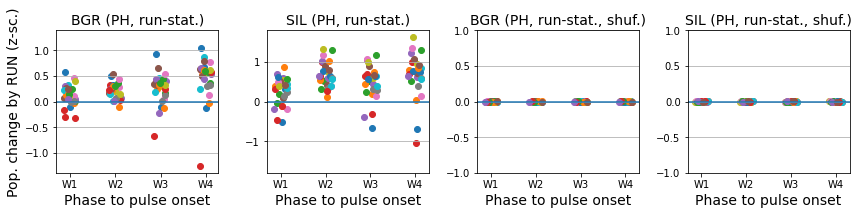

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

titles = ['BGR (PH, run-stat.)', 'SIL (PH, run-stat.)', 'BGR (PH, run-stat., shuf.)', 'SIL (PH, run-stat., shuf.)']
for j, s_type in enumerate(['BGR', 'SIL', 'BGR_SHUF', 'SIL_SHUF']):
    ax = axes[j]
    v_max = 0
    for i, (session, deltas_all) in enumerate(s_deltas.items()):
        offset = (np.random.rand(1)[0] - 0.5)*0.3
        if j < 2:
            vals = deltas_all[s_type]
        else:
            vals = np.array([deltas_all[s_type][z].mean() for z in range(4)])
        ax.scatter(np.arange(4) + offset, vals, label=session[-19:-9])
        cv_max = np.abs(np.array(vals)).max()
        if cv_max > v_max:
            v_max = cv_max
    ax.axhline(0)
    ax.grid(axis='y')
    ax.set_ylim(-v_max*1.1, v_max*1.1)
    ax.set_title(titles[j], fontsize=14)
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(['W1', 'W2', 'W3', 'W4'])
    ax.set_xlabel('Phase to pulse onset', fontsize=14)
    if j> 1:
    #    ax.legend()
        ax.set_ylim(-1, 1)
    
axes[0].set_ylabel('Pop. change by RUN (z-sc.)', fontsize=14)
fig.tight_layout()

In [26]:
#fig.savefig(os.path.join(report, 'population', 'W1-W4_tSNE_PHr_PHs_%s_cross.pdf' % animal))
fig.savefig(os.path.join(report, 'population', 'W1-W4_tSNE_PHr_PHs_%s_cross.png' % animal), dpi=300)

## Cross-animal plot

In [23]:
s_deltas_2 = dict(s_deltas)

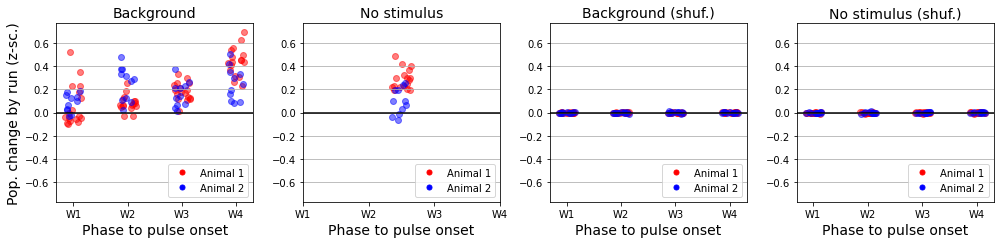

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(14, 3.5))

labels = ['Animal 1', 'Animal 2']
colors = ['red', 'blue']
titles = ['Background', 'No stimulus', 'Background (shuf.)', 'No stimulus (shuf.)']

v_max = 0
label_set = 0
for j, s_type in enumerate(['BGR', 'SIL', 'BGR_SHUF', 'SIL_SHUF']):
    ax = axes[j]
    for k, s_deltas_c in enumerate([s_deltas_1, s_deltas_2]):
        for i, (session, deltas_all) in enumerate(s_deltas_c.items()):
            offset = (np.random.rand(1)[0] - 0.5)*0.3
            x_vals = np.arange(4) + offset
            if j == 0:
                y_vals = deltas_all[s_type]
            elif j == 1:
                x_vals = 1.5 + offset
                y_vals = np.array(deltas_all[s_type]).mean()
            else:
                y_vals = np.array([deltas_all[s_type][z].mean() for z in range(4)])
            ax.scatter(x_vals, y_vals, color=colors[k], alpha=0.5)
            cv_max = np.abs(np.array(y_vals)).max()
            if cv_max > v_max:
                v_max = cv_max
    ax.axhline(0, color='black')
    ax.grid(axis='y')
    ax.set_title(titles[j], fontsize=14)
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(['W1', 'W2', 'W3', 'W4'])
    ax.set_xlabel('Phase to pulse onset', fontsize=14)
    if j> 1:
        ax.set_ylim(-1, 1)

legend_elements = [
    Line2D([0], [0], marker='.', linestyle='None', color='red', markersize=10, label='Animal 1'),
    Line2D([0], [0], marker='.', linestyle='None', color='blue', markersize=10, label='Animal 2')
]
for ax in axes:
    ax.set_ylim(-v_max*1.1, v_max*1.1)
    ax.legend(handles=legend_elements, loc='lower right')

axes[0].set_ylabel('Pop. change by run (z-sc.)', fontsize=14)
fig.tight_layout()

In [25]:
fig.savefig(os.path.join(report, 'showroom', 'sta_run_pop_change_cross.png'), dpi=300)

## Based on that SNR - show it decreases